In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline


In [178]:
emp_data = pd.read_csv(r'E:\Test trail\Data\HR_comma_sep.csv.txt')
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [179]:
emp_data.rename(columns={'sales':'department'}, inplace=True)

In [180]:
emp_data.corr()['left']

C:\Users\vmraj\AppData\Local\Temp\ipykernel_18980\2730381567.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  emp_data.corr()['left']


satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

In [310]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 2000 to 14210
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11428 non-null  float64
 1   last_evaluation        11428 non-null  float64
 2   number_project         11428 non-null  int64  
 3   average_montly_hours   11428 non-null  int64  
 4   time_spend_company     11428 non-null  int64  
 5   Work_accident          11428 non-null  int64  
 6   left                   11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   department             11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 982.1+ KB


In [338]:
cat_emp_data = emp_data.select_dtypes('object')
int_emp_data = emp_data.select_dtypes('int64')
int_emp_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
2000,4,215,3,0,0,0
2001,2,202,3,0,0,0
2002,5,193,3,0,0,0
2003,5,247,3,0,0,0
2004,3,214,2,0,0,0


C:\Users\vmraj\AppData\Local\Temp\ipykernel_18980\2799468618.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emp_data['left'], bins = 30)
c:\Users\vmraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<AxesSubplot: xlabel='left', ylabel='Density'>

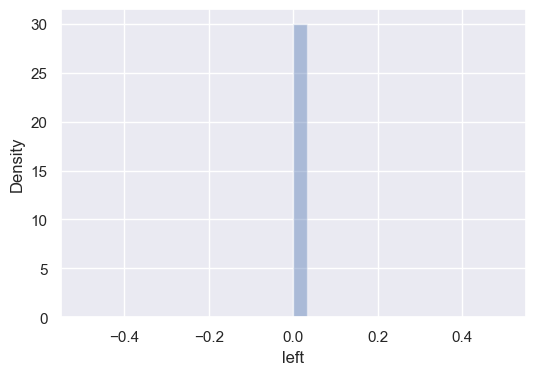

In [339]:
# Getting an idea about outliers in Target variable

sns.set(rc = {'figure.figsize' : (6,4)})
sns.distplot(emp_data['left'], bins = 30)

In [340]:
# Removing outliers

emp_data = emp_data[emp_data['left']<0.2]

C:\Users\vmraj\AppData\Local\Temp\ipykernel_18980\3294488361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(emp_data['left'], bins = 30)
c:\Users\vmraj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<AxesSubplot: xlabel='left', ylabel='Density'>

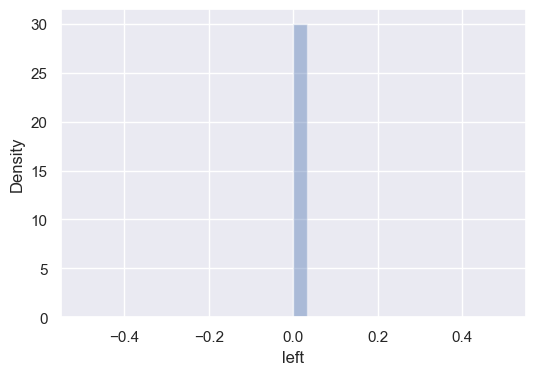

In [341]:
sns.set(rc = {'figure.figsize' : (6,4)})
sns.distplot(emp_data['left'], bins = 30)

C:\Users\vmraj\AppData\Local\Temp\ipykernel_18980\148283897.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = emp_data.corr().round(2)


<AxesSubplot: >

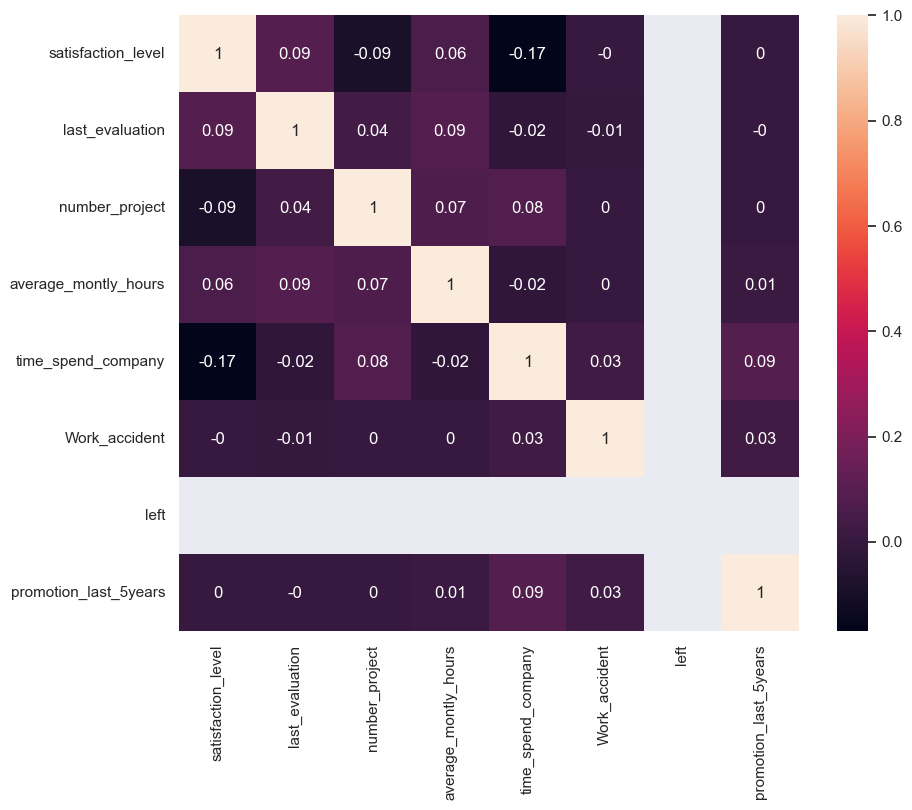

In [342]:
# Multi-collinearity Test

cm = emp_data.corr().round(2)
sns.set(rc = {'figure.figsize' : (10,8)})
sns.heatmap(data = cm, annot = True)

In [343]:
le = LabelEncoder()
ohe = OneHotEncoder()
le.fit(cat_emp_data.department)

LabelEncoder()

In [344]:
cat_emp_data['department_tf'] = le.transform(cat_emp_data.department)

In [345]:
cat_emp_data.head()

,department,salary,department_tf
2000,sales,low,7
2001,sales,low,7
2002,sales,low,7
2003,sales,low,7
2004,sales,low,7


In [346]:
le.classes_

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [347]:
le.inverse_transform([7])

array(['sales'], dtype=object)

In [348]:
ohe.fit(cat_emp_data[['department_tf']])

OneHotEncoder()

In [349]:
department_tf = ohe.transform(cat_emp_data[['department_tf']]).toarray()

In [350]:
def func(x):
    def mapping(d):
        if d == 'low':
            return 1
        elif d == 'medium':
            return 2
        else:
            return 3
    return x.map( mapping )
        
ft = FunctionTransformer(func, validate=False)

In [351]:
cat_emp_data['salary_tf'] = ft.transform(cat_emp_data.salary)

In [352]:
int_emp_data.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
2000,4,215,3,0,0,0
2001,2,202,3,0,0,0
2002,5,193,3,0,0,0
2003,5,247,3,0,0,0
2004,3,214,2,0,0,0


In [353]:
int_emp_data.drop('left',axis=1, inplace=True)

In [354]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(int_emp_data)

MinMaxScaler()

In [355]:
int_tf = mms.transform(int_emp_data)
int_tf

array([[0.5       , 0.62303665, 0.125     , 0.        , 0.        ],
       [0.        , 0.55497382, 0.125     , 0.        , 0.        ],
       [0.75      , 0.5078534 , 0.125     , 0.        , 0.        ],
       ...,
       [0.25      , 0.46596859, 1.        , 0.        , 1.        ],
       [0.25      , 0.39790576, 1.        , 0.        , 1.        ],
       [0.5       , 0.43979058, 0.125     , 0.        , 0.        ]])

In [356]:
float_tf = emp_data[['satisfaction_level','last_evaluation']].values


In [357]:
cat_emp_data['salary_tf'].values.shape

(11428,)

In [358]:
int_tf.shape

(11428, 5)

In [359]:
department_tf[:2]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [360]:
salary_tf = cat_emp_data['salary_tf'].values.reshape(-1,1)
feature_data = np.hstack([department_tf,int_tf,float_tf,salary_tf])
target_data = emp_data.left

In [361]:
# Seperating input features and target variable 

X = feature_data
y = target_data

In [362]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=7)

In [363]:
# Linear Regression Model

model = LinearRegression()

# Fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [364]:
# Model Evaluation

y_train_predict = model.predict(X_train)
train_rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
train_r2 = r2_score(y_train,y_train_predict)

print('Training RMSE  :', train_rmse)
print('Training R2 : ', train_r2)

y_test_predict = model.predict(X_test)
test_rmse = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
test_r2 = r2_score(y_test,y_test_predict)

print('Testing RMSE  :', test_rmse)
print('Testing R2 : ', test_r2)

Training RMSE  : 0.0
Training R2 :  1.0
Testing RMSE  : 0.0
Testing R2 :  1.0
